In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


test = pd.read_csv("test.csv")
train= pd.read_csv("train.csv");

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values in Age, Cabin, Embarked

Impute Age and Embarked

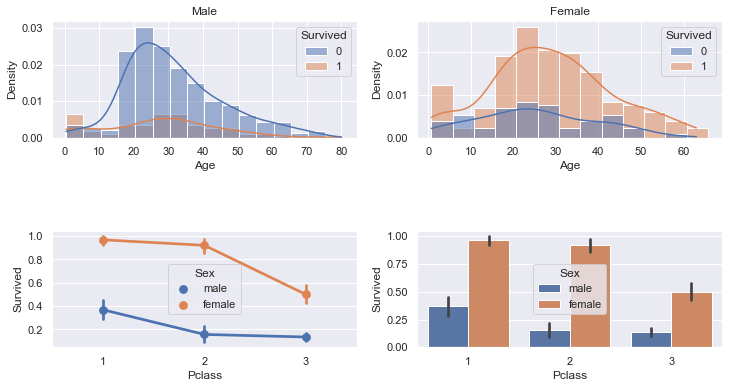

In [34]:
fig, ax = plt.subplots(2, 2, figsize = (12,6))
plt.subplots_adjust(hspace = 0.8)

sns.histplot(data = train[train.Sex=="male"], x = "Age", hue="Survived", kde = True, stat="density", ax = ax[0,0], binwidth=5)
ax[0,0].set_title("Male")
sns.histplot(data = train[train.Sex=="female"], x = "Age", hue="Survived", kde = True, stat="density", ax = ax[0,1], binwidth=5)
ax[0,1].set_title("Female");
sns.pointplot(y = train.Survived, x = train.Pclass, hue = train.Sex, ax = ax[1,0])
sns.barplot(data = train, x = "Pclass", y = "Survived", hue = "Sex", ax = ax[1,1]);



<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

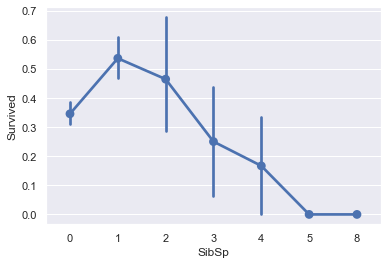

In [35]:
sns.pointplot(data = train, x = "SibSp", y = "Survived")


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

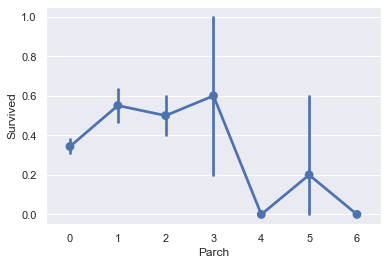

In [36]:

sns.pointplot(data = train, x = "Parch", y = "Survived")

In [37]:
train["Title"] = np.NaN
for i in range(0, len(train)):
    train["Title"][i] = train["Name"].str.split()[i][1]

test["Title"] = np.NaN
for i in range(0, len(test)):
    test["Title"][i] = test["Name"].str.split()[i][1]



C:\Users\morit\AppData\Local\Temp\ipykernel_15720\2274055101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Title"][i] = train["Name"].str.split()[i][1]
C:\Users\morit\AppData\Local\Temp\ipykernel_15720\2274055101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Title"][i] = test["Name"].str.split()[i][1]


In [38]:
train["Title"].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Title, dtype: int64

In [39]:
titles = list(train["Title"].value_counts().index[0:4])
titles

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [40]:
for i in range(0, len(train)):
    if not any(x in train.Title[i] for x in titles):
        train.Title[i] = "other"

for i in range(0, len(test)):
    if not any(x in test.Title[i] for x in titles):
        test.Title[i] = "other"

In [41]:
train.Title.value_counts()

Mr.        502
Miss.      179
Mrs.       121
other       49
Master.     40
Name: Title, dtype: int64

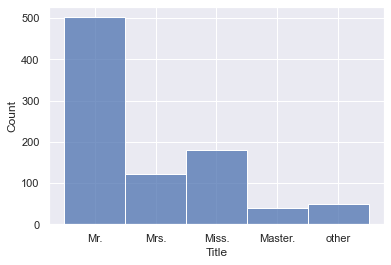

In [42]:
sns.histplot(train.Title);

<AxesSubplot:xlabel='Title', ylabel='Survived'>

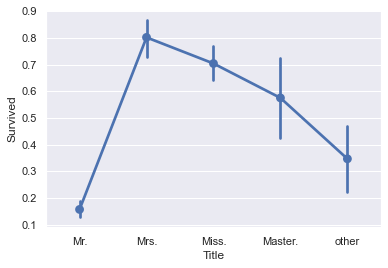

In [43]:
sns.pointplot(y = train.Survived, x = train.Title)

In [44]:
train["Family"] = np.NAN
test["Family"] = np.NAN

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,NaN


In [46]:
for i in range(0, len(train)):
    if((train.SibSp[i] > 0) or (train.Parch[i] > 0) ):
        train.Family[i] = 1
    else:
        train.Family[i] = 0


for i in range(0, len(test)):
    if((test.SibSp[i] > 0) or (test.Parch[i] > 0) ):
        test.Family[i] = 1
    else:
        test.Family[i] = 0

C:\Users\morit\AppData\Local\Temp\ipykernel_15720\1324295791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Family[i] = 1
C:\Users\morit\AppData\Local\Temp\ipykernel_15720\1324295791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Family[i] = 0
C:\Users\morit\AppData\Local\Temp\ipykernel_15720\1324295791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Family[i] = 0
C:\Users\morit\AppData\Local\Temp\ipyker

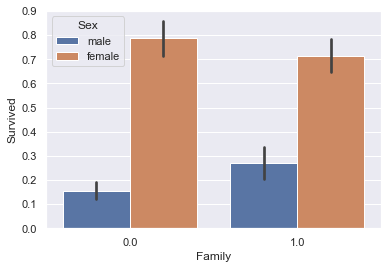

In [74]:
sns.barplot(data = train, x = "Family", y = "Survived", hue = "Sex");

In [96]:
num_cols = ["Age", "Fare"]
cat_cols = ["Pclass", "Sex", "Embarked", "Title", "Family"]

train_final = train[num_cols + cat_cols]
test_final = test[num_cols + cat_cols]

In [49]:
train_final.head()

,Age,Fare,Pclass,Sex,Embarked,Title,Family
0,22.0,7.2500,3,male,S,Mr.,1.0
1,38.0,71.2833,1,female,C,Mrs.,1.0
2,26.0,7.9250,3,female,S,Miss.,0.0
3,35.0,53.1000,1,female,S,Mrs.,1.0
4,35.0,8.0500,3,male,S,Mr.,0.0


In [50]:
test_final.head()

,Age,Fare,Pclass,Sex,Embarked,Title,Family
0,22.0,7.2500,3,male,S,Mr.,1.0
1,38.0,71.2833,1,female,C,Mrs.,1.0
2,26.0,7.9250,3,female,S,Miss.,0.0
3,35.0,53.1000,1,female,S,Mrs.,1.0
4,35.0,8.0500,3,male,S,Mr.,0.0


In [112]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [133]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

model_randomforst = RandomForestClassifier(n_estimators=100, random_state=0)
model_xgb = xgb.XGBClassifier()


In [134]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_randomforst)
                             ])

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100],
}

grid = GridSearchCV(my_pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [136]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_pipeline, train_final, train.Survived,
                              cv=5)

print("MAE scores:\n", scores)

MAE scores:
 [0.78212291 0.80337079 0.84831461 0.76966292 0.80898876]


In [137]:
my_pipeline.fit(train_final, train.Survived)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title', 'Family'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [138]:
predictions = my_pipeline.predict(test_final)

In [118]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)